In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv("train_data.csv")

In [104]:
df

,MatchID,WhiteElo,BlackElo,ECO,eval,Result
0,1,2569,2462,D12,0.29,1
1,2,2581,2574,B00,-0.22,0
2,3,2573,2479,B53,-3.13,0
3,4,2602,2343,A40,1.00,1
4,5,2578,2575,C03,0.91,1
...,...,...,...,...,...,...
9995,9996,2487,2510,B28,1.34,0
9996,9997,2566,2697,A40,1.36,0
9997,9998,2498,2566,A04,0.32,0
9998,9999,2815,2486,C10,0.50,1


In [105]:
test_data = pd.read_csv("test_data.csv")
test_data

,MatchID,WhiteElo,BlackElo,ECO,eval
0,10001,2533,2390,B24,0.01
1,10002,2638,2490,A05,1.14
2,10003,2565,2737,E24,1.66
3,10004,2506,2539,A04,-0.08
4,10005,2470,2513,B02,0.64
...,...,...,...,...,...
1495,11496,2530,2522,B28,1.22
1496,11497,2501,2370,A36,-1.20
1497,11498,2515,2553,B40,0.70
1498,11499,2590,2459,E10,0.35


## Converting ECO to numbers

In [106]:
# if result is 1 then winner is white
df['winner']= df['Result'].apply(lambda x: 'white' if x == 1 else 'black')
df_ = pd.crosstab(df.ECO, columns = df.winner, normalize = 'index')
print(df_)
print(df)

winner     black     white
ECO                       
A00     0.437500  0.562500
A01     0.385417  0.614583
A02     0.390244  0.609756
A03     0.300000  0.700000
A04     0.417989  0.582011
..           ...       ...
E94     0.588235  0.411765
E95     0.666667  0.333333
E97     0.416667  0.583333
E98     0.428571  0.571429
E99     1.000000  0.000000

[442 rows x 2 columns]
      MatchID  WhiteElo  BlackElo  ECO  eval  Result winner
0           1      2569      2462  D12  0.29       1  white
1           2      2581      2574  B00 -0.22       0  black
2           3      2573      2479  B53 -3.13       0  black
3           4      2602      2343  A40  1.00       1  white
4           5      2578      2575  C03  0.91       1  white
...       ...       ...       ...  ...   ...     ...    ...
9995     9996      2487      2510  B28  1.34       0  black
9996     9997      2566      2697  A40  1.36       0  black
9997     9998      2498      2566  A04  0.32       0  black
9998     9999      2815  

In [107]:
dict(df_['white'])

{'A00': 0.5625,
 'A01': 0.6145833333333334,
 'A02': 0.6097560975609756,
 'A03': 0.7,
 'A04': 0.582010582010582,
 'A05': 0.5714285714285714,
 'A06': 0.5,
 'A07': 0.48314606741573035,
 'A08': 0.7222222222222222,
 'A09': 0.4888888888888889,
 'A10': 0.45454545454545453,
 'A11': 0.6666666666666666,
 'A12': 0.5,
 'A13': 0.47297297297297297,
 'A14': 0.5,
 'A15': 0.638095238095238,
 'A16': 0.4074074074074074,
 'A17': 0.625,
 'A18': 0.3333333333333333,
 'A19': 0.2,
 'A20': 0.6511627906976745,
 'A21': 0.6086956521739131,
 'A22': 0.42857142857142855,
 'A23': 0.5,
 'A24': 0.0,
 'A25': 0.5,
 'A27': 0.625,
 'A28': 0.3157894736842105,
 'A29': 0.6666666666666666,
 'A30': 0.5652173913043478,
 'A31': 0.6111111111111112,
 'A32': 0.5,
 'A33': 0.7142857142857143,
 'A34': 0.6666666666666666,
 'A35': 0.5454545454545454,
 'A36': 0.2857142857142857,
 'A37': 0.5384615384615384,
 'A38': 0.0,
 'A39': 0.5,
 'A40': 0.5533980582524272,
 'A41': 0.5185185185185185,
 'A42': 0.47058823529411764,
 'A43': 0.57471264367816

In [108]:
df

,MatchID,WhiteElo,BlackElo,ECO,eval,Result,winner
0,1,2569,2462,D12,0.29,1,white
1,2,2581,2574,B00,-0.22,0,black
2,3,2573,2479,B53,-3.13,0,black
3,4,2602,2343,A40,1.00,1,white
4,5,2578,2575,C03,0.91,1,white
...,...,...,...,...,...,...,...
9995,9996,2487,2510,B28,1.34,0,black
9996,9997,2566,2697,A40,1.36,0,black
9997,9998,2498,2566,A04,0.32,0,black
9998,9999,2815,2486,C10,0.50,1,white


In [109]:
df['ECO']= df['ECO'].map(dict(df_['white']))

In [110]:
df

,MatchID,WhiteElo,BlackElo,ECO,eval,Result,winner
0,1,2569,2462,0.588235,0.29,1,white
1,2,2581,2574,0.488636,-0.22,0,black
2,3,2573,2479,0.555556,-3.13,0,black
3,4,2602,2343,0.553398,1.00,1,white
4,5,2578,2575,0.333333,0.91,1,white
...,...,...,...,...,...,...,...
9995,9996,2487,2510,0.440000,1.34,0,black
9996,9997,2566,2697,0.553398,1.36,0,black
9997,9998,2498,2566,0.582011,0.32,0,black
9998,9999,2815,2486,0.551724,0.50,1,white


In [111]:
test_data

,MatchID,WhiteElo,BlackElo,ECO,eval
0,10001,2533,2390,B24,0.01
1,10002,2638,2490,A05,1.14
2,10003,2565,2737,E24,1.66
3,10004,2506,2539,A04,-0.08
4,10005,2470,2513,B02,0.64
...,...,...,...,...,...
1495,11496,2530,2522,B28,1.22
1496,11497,2501,2370,A36,-1.20
1497,11498,2515,2553,B40,0.70
1498,11499,2590,2459,E10,0.35


In [112]:

df = df.drop('MatchID', axis=1)
test_data = test_data.drop('MatchID', axis=1)
df['prob_white_win']=np.ones(df.shape[0])/(np.ones(df.shape[0])+np.power(10, (df['BlackElo']-df['WhiteElo'])/400))
# df.drop(['winner','WhiteElo','BlackElo'], axis=1, inplace=True)
df.drop(['winner'], axis=1, inplace=True)
df


,WhiteElo,BlackElo,ECO,eval,Result,prob_white_win
0,2569,2462,0.588235,0.29,1,0.649295
1,2581,2574,0.488636,-0.22,0,0.510072
2,2573,2479,0.555556,-3.13,0,0.632070
3,2602,2343,0.553398,1.00,1,0.816217
4,2578,2575,0.333333,0.91,1,0.504317
...,...,...,...,...,...,...
9995,2487,2510,0.440000,1.34,0,0.466949
9996,2566,2697,0.553398,1.36,0,0.319929
9997,2498,2566,0.582011,0.32,0,0.403371
9998,2815,2486,0.551724,0.50,1,0.869197


<AxesSubplot:>

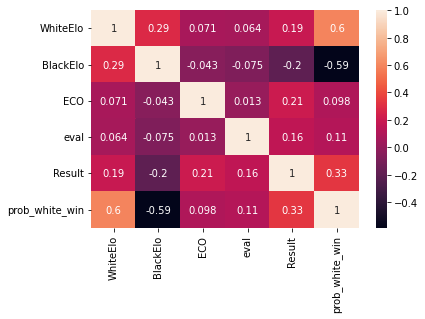

In [113]:
sns.heatmap(df.corr(), annot=True)

## Text to category [Method 2]

In [114]:
# dum = pd.get_dummies(df['ECO'], drop_first=True)
# df = pd.concat([df.drop('ECO', axis=1), dum], axis=1)
# df

In [115]:
# dum = pd.get_dummies(test_data['ECO'], drop_first=True)
# test_data = pd.concat([test_data.drop('ECO', axis=1), dum], axis=1)
# test_data

In [116]:
# df['diff'] = df['WhiteElo'] - df['BlackElo']
# df

In [117]:
# df = df.drop('WhiteElo', axis=1)
# df

In [118]:
# df = df.drop('BlackElo', axis=1)
df

,WhiteElo,BlackElo,ECO,eval,Result,prob_white_win
0,2569,2462,0.588235,0.29,1,0.649295
1,2581,2574,0.488636,-0.22,0,0.510072
2,2573,2479,0.555556,-3.13,0,0.632070
3,2602,2343,0.553398,1.00,1,0.816217
4,2578,2575,0.333333,0.91,1,0.504317
...,...,...,...,...,...,...
9995,2487,2510,0.440000,1.34,0,0.466949
9996,2566,2697,0.553398,1.36,0,0.319929
9997,2498,2566,0.582011,0.32,0,0.403371
9998,2815,2486,0.551724,0.50,1,0.869197


In [119]:
X = df.drop('Result', axis=1)
y = df['Result']

In [120]:
test_data

,WhiteElo,BlackElo,ECO,eval
0,2533,2390,B24,0.01
1,2638,2490,A05,1.14
2,2565,2737,E24,1.66
3,2506,2539,A04,-0.08
4,2470,2513,B02,0.64
...,...,...,...,...
1495,2530,2522,B28,1.22
1496,2501,2370,A36,-1.20
1497,2515,2553,B40,0.70
1498,2590,2459,E10,0.35


In [121]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaler.fit(X_train)

In [124]:
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [126]:
X_train = scaler.fit_transform(X_train)
# X_test['ECO']= X_test['ECO'].map(dict(df_['white']))
# X_test['prob_white_win']=np.ones(X_test.shape[0])/(np.ones(X_test.shape[0])+np.power(10, (X_test['BlackElo']-X_test['WhiteElo'])/400))
X_test = scaler.transform(X_test)

In [127]:
## Random Classifier

In [128]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [129]:
y_pred = rf.predict(X_test)

In [130]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.638


In [131]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[601 387]
 [337 675]]


In [132]:
##Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [135]:
predictions = logmodel.predict(X_test)

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       988
           1       0.67      0.72      0.69      1012

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000



In [137]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.679


In [138]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[628 360]
 [282 730]]


In [139]:
## mlp

In [140]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

In [141]:
le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)
X.head()

,WhiteElo,BlackElo,ECO,eval,prob_white_win
0,269,161,97,288,494
1,281,273,53,237,394
2,273,178,86,26,481
3,302,42,85,359,646
4,278,274,12,350,390


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [142]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 
X_train 


array([[ 2.10210308,  1.07523682,  0.03155967, -0.8421427 ,  0.97671647],
       [ 0.75710754, -0.74383359,  0.3472362 ,  1.68445671,  1.34501347],
       [ 0.6026148 ,  0.55814066, -0.25824174, -0.30583622,  0.05150649],
       ...,
       [ 1.01156615,  1.48152666, -0.02195767, -3.53559301, -0.4310248 ],
       [-0.00626832,  1.32455104,  1.20617001,  0.26622403, -1.20507441],
       [-0.46974651, -1.87959836,  0.11000215, -0.24624661,  1.25855963]])

In [96]:
# Finally for the MLP- Multilayer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train.values.ravel())  

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [97]:
predictions = mlp.predict(X_test)

In [98]:
print(predictions)

[1 1 1 ... 0 1 0]


In [100]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))  

[[587 358]
 [320 735]]
              precision    recall  f1-score   support

           0       0.65      0.62      0.63       945
           1       0.67      0.70      0.68      1055

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000

0.661


In [ ]:
## LightGBM

In [ ]:
!pip install lightgbm

In [143]:
from lightgbm import LGBMClassifier
modelgbm=LGBMClassifier()
modelgbm.fit(X_train, y_train)
y_pred = modelgbm.predict(X_test)

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       988
           1       0.64      0.69      0.66      1012

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000



In [145]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6435


## Final Probabilities for Submission

In [147]:
test_data['ECO']= test_data['ECO'].map(dict(df_['white']))
test_data['prob_white_win']=np.ones(test_data.shape[0])/(np.ones(test_data.shape[0])+np.power(10, (test_data['BlackElo']-test_data['WhiteElo'])/400))
test_data

,WhiteElo,BlackElo,ECO,eval,prob_white_win
0,2533,2390,0.588235,0.01,0.694910
1,2638,2490,0.571429,1.14,0.700977
2,2565,2737,0.727273,1.66,0.270890
3,2506,2539,0.582011,-0.08,0.452651
4,2470,2513,0.514286,0.64,0.438432
...,...,...,...,...,...
1495,2530,2522,0.440000,1.22,0.511511
1496,2501,2370,0.285714,-1.20,0.680071
1497,2515,2553,0.482759,0.70,0.445531
1498,2590,2459,0.454545,0.35,0.680071


In [149]:
# test_data['ECO'] = test_data['ECO'].astype('int')
proba = modelgbm.predict_proba(test_data)

In [ ]:
# proba = mlp.predict_proba(test_data)

In [ ]:
# proba = logmodel.predict_proba(test_data)

In [150]:
proba = pd.DataFrame(proba)
proba

,0,1
0,0.340833,0.659167
1,0.250202,0.749798
2,0.326991,0.673009
3,0.404193,0.595807
4,0.290969,0.709031
...,...,...
1495,0.228277,0.771723
1496,0.350677,0.649323
1497,0.298872,0.701128
1498,0.407145,0.592855


In [151]:
proba = proba.iloc[:, 1]
proba

0       0.659167
1       0.749798
2       0.673009
3       0.595807
4       0.709031
          ...   
1495    0.771723
1496    0.649323
1497    0.701128
1498    0.592855
1499    0.577710
Name: 1, Length: 1500, dtype: float64

In [152]:
testID  = pd.read_csv("test_data.csv")
testID = testID['MatchID']
proba = pd.concat([testID, proba], ignore_index=True, axis=1)
proba

,0,1
0,10001,0.659167
1,10002,0.749798
2,10003,0.673009
3,10004,0.595807
4,10005,0.709031
...,...,...
1495,11496,0.771723
1496,11497,0.649323
1497,11498,0.701128
1498,11499,0.592855


In [153]:
proba.rename(columns = {0:'MatchID'}, inplace = True)
proba.rename(columns = {1:'Prob'}, inplace = True)
proba

,MatchID,Prob
0,10001,0.659167
1,10002,0.749798
2,10003,0.673009
3,10004,0.595807
4,10005,0.709031
...,...,...
1495,11496,0.771723
1496,11497,0.649323
1497,11498,0.701128
1498,11499,0.592855


In [ ]:
proba.to_csv("Q5_test.csv")